In [1]:
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def createDataset(data_size):
    dataset = []
    label = []
    for i in range(data_size):
        if i % 2 ==0:
            width, height = 1 , random.randint(1,45)
            images = []
            for frame in range(33):
                img = np.zeros((50,100),dtype=np.uint8)    
                img = cv2.circle(img,(width,height),1,(255,255,255),2)
                width +=3
                images.append(img)
            dataset.append(images)
            label.append(0)
        else:
            width, height = 97 , random.randint(1,45)
            images = []
            for frame in range(33):
                img = np.zeros((50,100),dtype=np.uint8)    
                img = cv2.circle(img,(width,height),1,(255,255,255),2)
                width -=3
                images.append(img)
            dataset.append(images)
            label.append(1)
    
    dataset,label = np.array(dataset), np.array(label)
    return dataset[...,np.newaxis], label[...,np.newaxis]

In [3]:
def visualization(dataset,num_data):
    for img in dataset[num_data]:
        plt.imshow(img,cmap="gray")
        plt.axis("off")
        plt.show()

In [4]:
X,Y = createDataset(200)

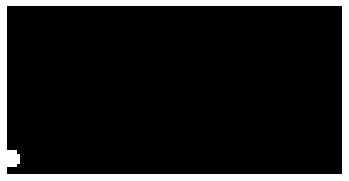

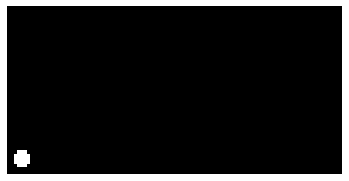

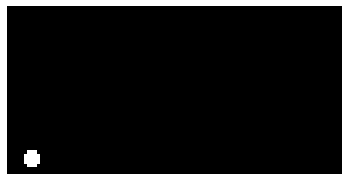

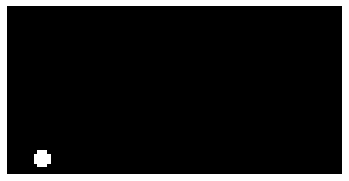

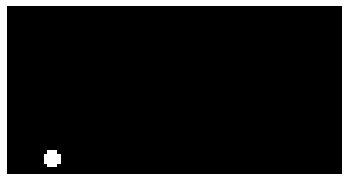

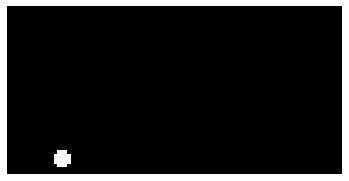

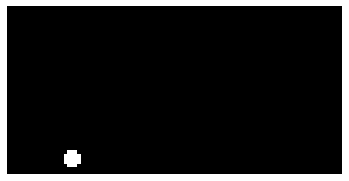

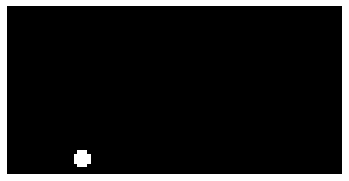

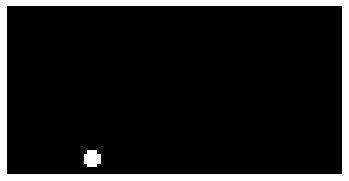

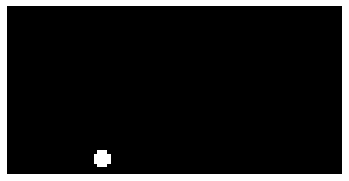

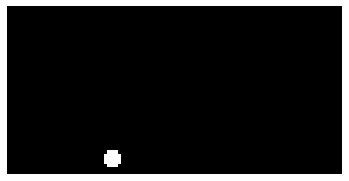

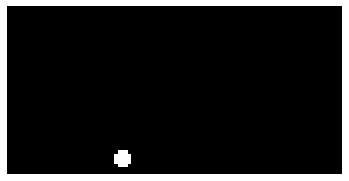

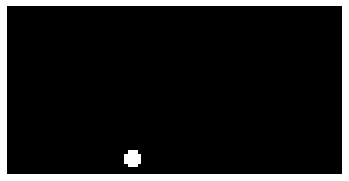

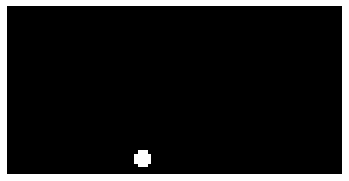

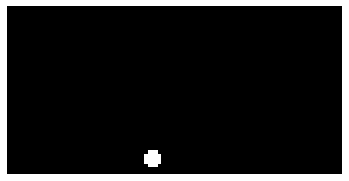

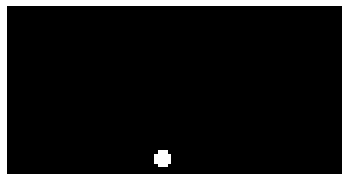

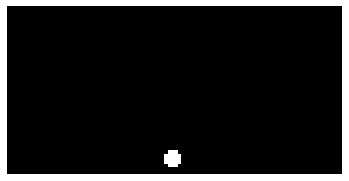

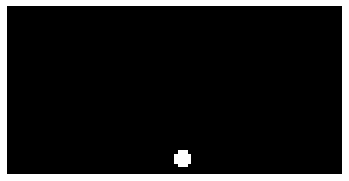

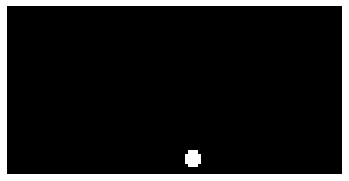

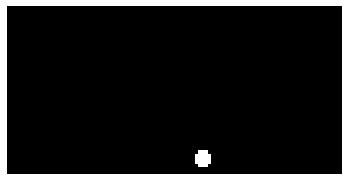

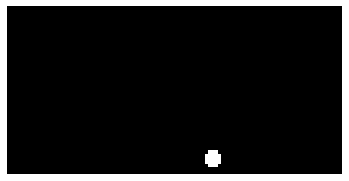

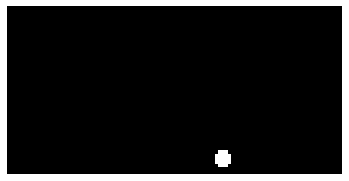

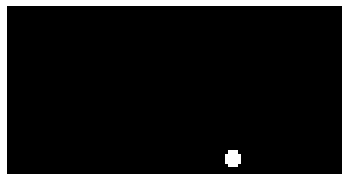

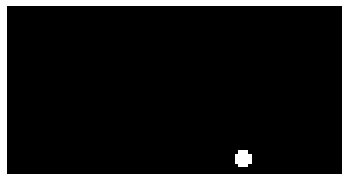

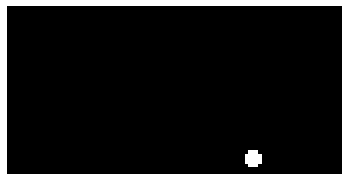

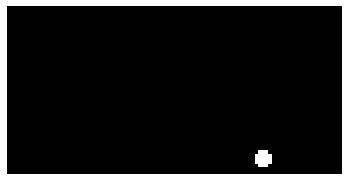

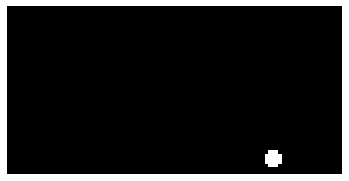

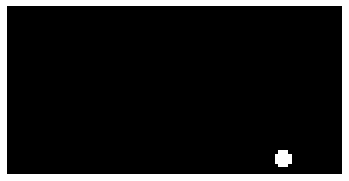

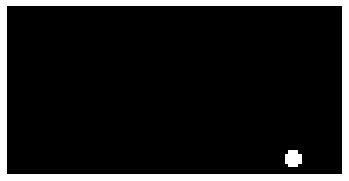

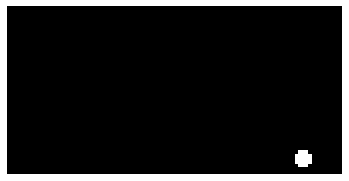

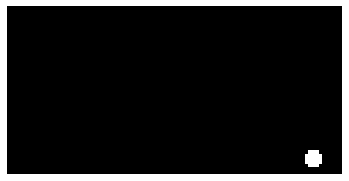

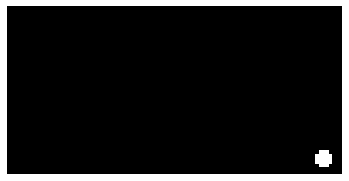

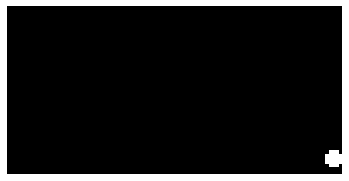

In [5]:
visualization(X,0)